In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
df_data = pd.read_csv('./data/jj.csv')
df_data.head(), df_data.tail()

(         date  data
 0  1960-01-01  0.71
 1  1960-04-01  0.63
 2  1960-07-02  0.85
 3  1960-10-01  0.44
 4  1961-01-01  0.61,
           date   data
 79  1979-10-01   9.99
 80  1980-01-01  16.20
 81  1980-04-01  14.67
 82  1980-07-02  16.02
 83  1980-10-01  11.61)

In [4]:
df_data.shape

(84, 2)

In [5]:
df_data.date.min(), df_data.date.max()

('1960-01-01', '1980-10-01')

In [6]:
df_data.index = pd.date_range(start='1960-01-01', end='1981-01-01', freq='3ME')

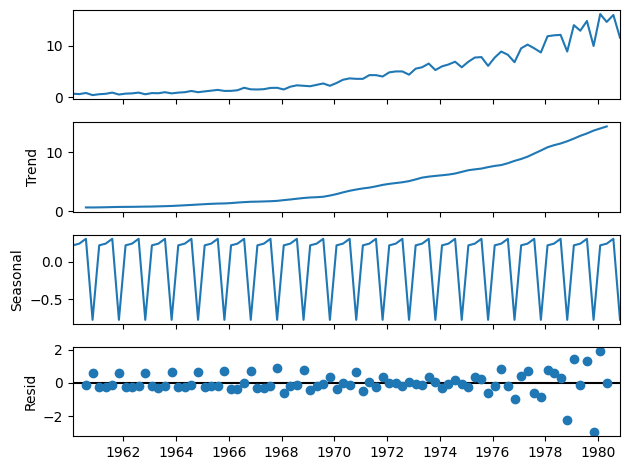

In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = df_data.copy()
result = seasonal_decompose( a.drop(columns =['date']) )
result.plot()
plt.show()

<Axes: >

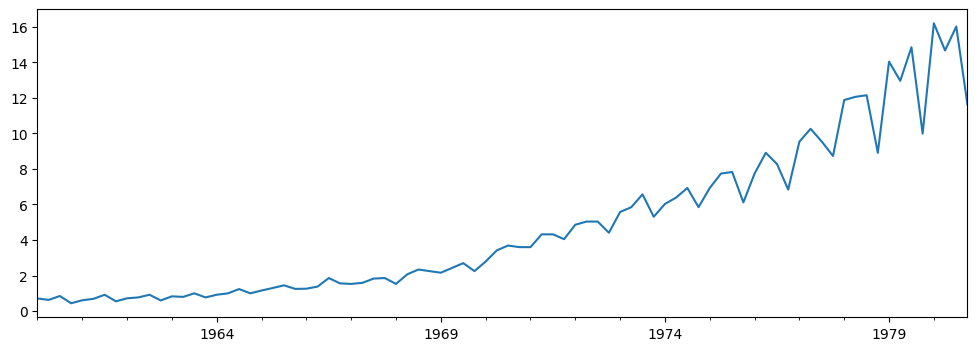

In [192]:
fig = plt.figure(figsize=(12,4))
result.observed.plot()

<Axes: >

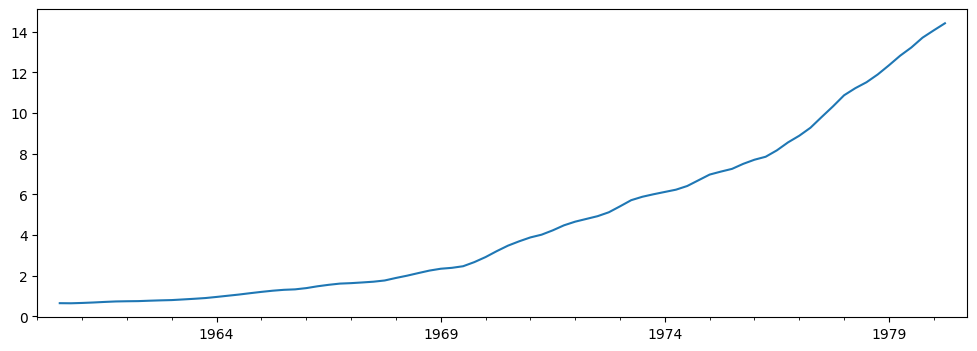

In [189]:
fig = plt.figure(figsize=(12,4))
result.trend.plot()

<Axes: >

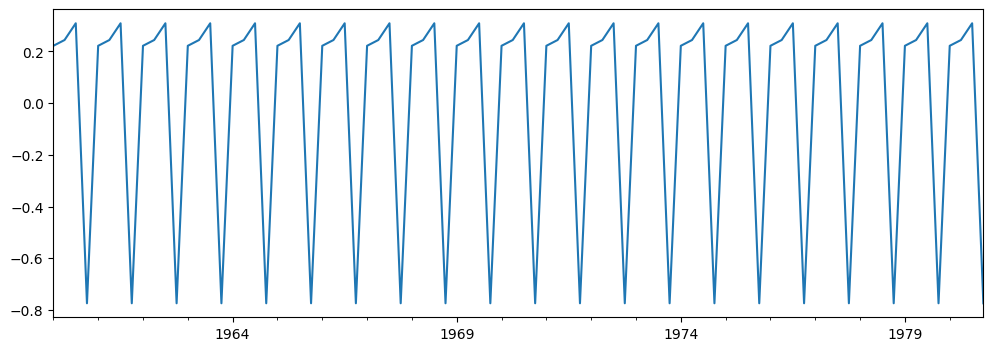

In [190]:
fig = plt.figure(figsize=(12,4))
result.seasonal.plot()

<Axes: >

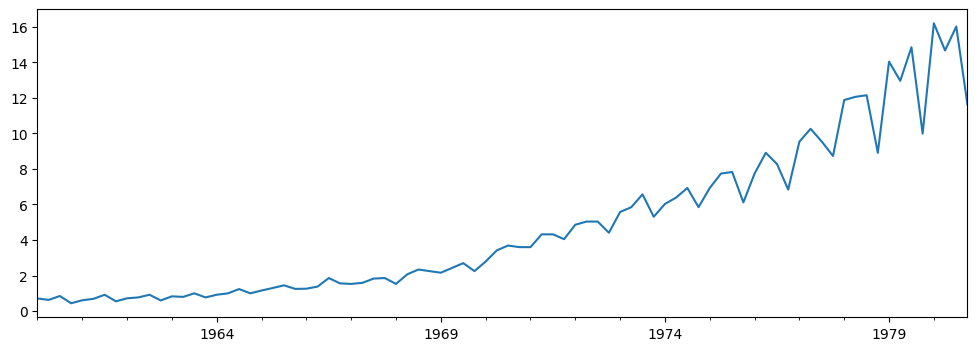

In [193]:
df_data.data.plot(figsize=(12,4))

<Axes: >

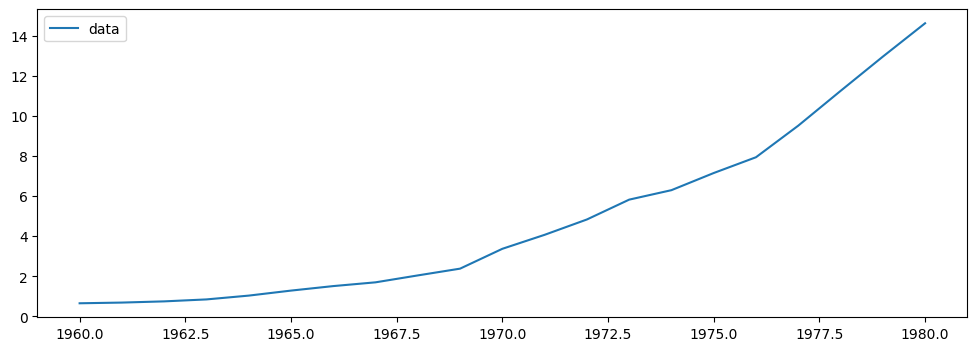

In [194]:
a = df_data.groupby(df_data.index.year).agg({'data':'mean'})
a.plot(figsize=(12,4))

In [195]:
import torch
from torch import nn
from torch.nn.functional import normalize
criterion = nn.MSELoss()
loss = {}


<Axes: >

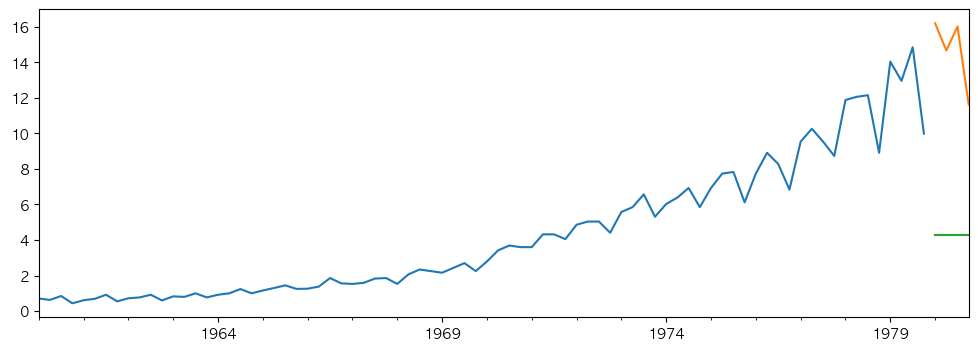

In [270]:
df_data['pred_mean'] = df_data.loc['1960-01-31':'1979-10-31', 'data'].mean()
fig = plt.figure(figsize=(12,4))
df_data[:-4].data.plot()
df_data[-4:].data.plot()
df_data[-4:].pred_mean.plot()

In [271]:
value = criterion( torch.FloatTensor( df_data['pred_mean'][-4:].values),  torch.FloatTensor(df_data['data'][-4:].values) )
loss['60-70_mean'] =  value.item()

<Axes: >

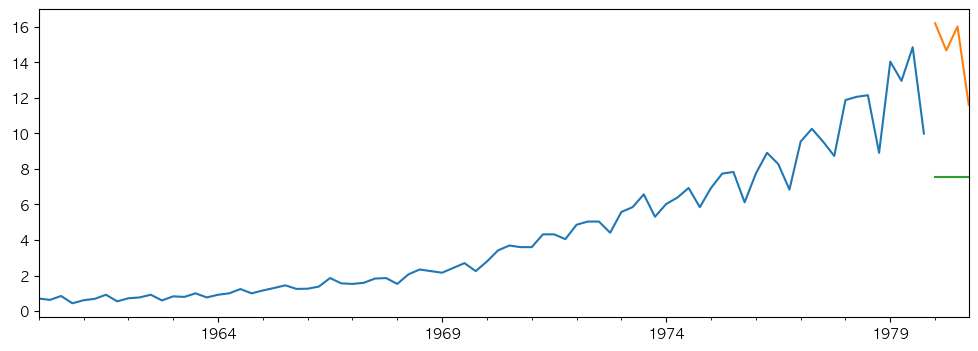

In [272]:
df_data['pred_mean'] = df_data.loc['1970-01-31':'1980-01-31', 'data'].mean()
fig = plt.figure(figsize=(12,4))
df_data[:-4].data.plot()
df_data[-4:].data.plot()
df_data[-4:].pred_mean.plot()

In [273]:
value = criterion( torch.FloatTensor( df_data['pred_mean'][-4:].values),  torch.FloatTensor(df_data['data'][-4:].values) )
loss['70_mean'] =  value.item()

<Axes: >

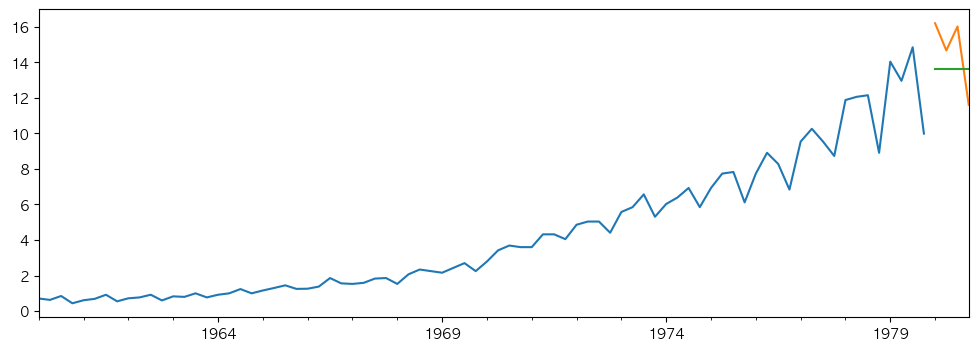

In [274]:
df_data['pred_mean'] = df_data.loc['1979-01-31':'1980-01-31', 'data'].mean()
fig = plt.figure(figsize=(12,4))
df_data[:-4].data.plot()
df_data[-4:].data.plot()
df_data[-4:].pred_mean.plot()

In [275]:
value = criterion( torch.FloatTensor( df_data['pred_mean'][-4:].values),  torch.FloatTensor(df_data['data'][-4:].values) )
loss['last_1_year_mean'] =  value.item()

<Axes: >

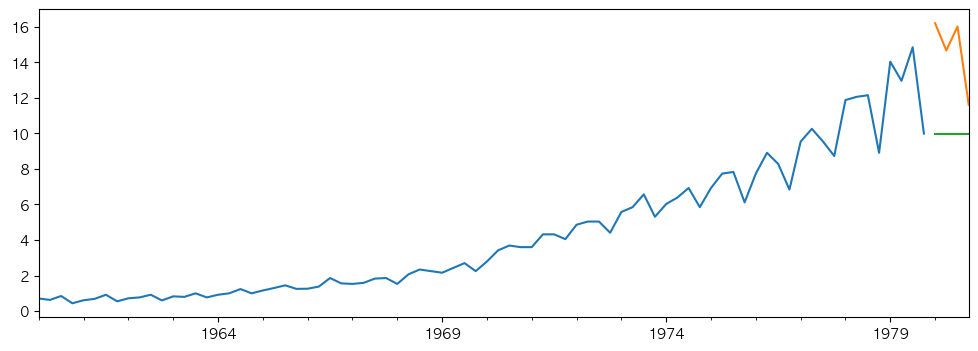

In [276]:
df_data['pred_mean'] = df_data.loc['1979-10-31', 'data']
fig = plt.figure(figsize=(12,4))
df_data[:-4].data.plot()
df_data[-4:].data.plot()
df_data[-4:].pred_mean.plot()

In [277]:
value = criterion( torch.FloatTensor( df_data['pred_mean'][-4:].values),  torch.FloatTensor(df_data['data'][-4:].values) )
loss['last_1_season'] =  value.item()

In [190]:
df_data.loc['1979-01-31':'1979-10-31']

,date,data,pred_mean
1979-01-31,1979-01-01,14.04,4.3085
1979-04-30,1979-04-02,12.96,4.3085
1979-07-31,1979-07-02,14.85,4.3085
1979-10-31,1979-10-01,9.99,4.3085


In [191]:
df_data['data'][-8:-4].values

array([14.04, 12.96, 14.85,  9.99])

In [278]:
df_data.loc['1980-01-31':'1980-10-31', 'pred_mean'] = df_data['data'][-8:-4].values
df_data

,date,data,pred_mean
1960-01-31,1960-01-01,0.71,9.99
1960-04-30,1960-04-01,0.63,9.99
1960-07-31,1960-07-02,0.85,9.99
1960-10-31,1960-10-01,0.44,9.99
1961-01-31,1961-01-01,0.61,9.99
...,...,...,...
1979-10-31,1979-10-01,9.99,9.99
1980-01-31,1980-01-01,16.20,14.04
1980-04-30,1980-04-01,14.67,12.96
1980-07-31,1980-07-02,16.02,14.85


<Axes: >

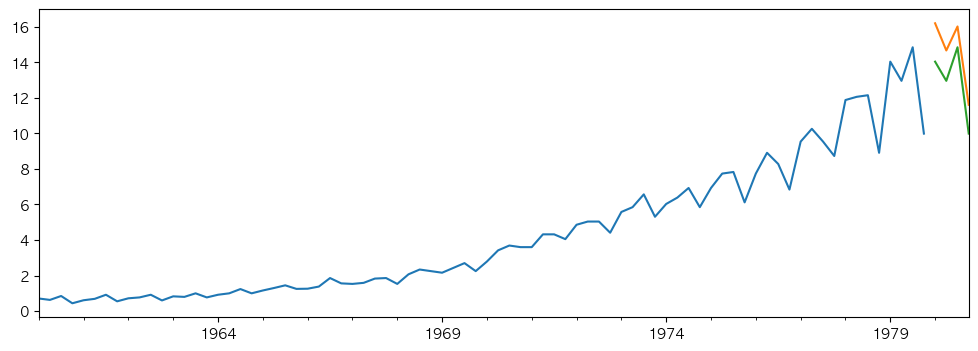

In [279]:
fig = plt.figure(figsize=(12,4))
df_data[:-4].data.plot()
df_data[-4:].data.plot()
df_data[-4:].pred_mean.plot()

In [280]:
value = criterion( torch.FloatTensor( df_data['pred_mean'][-4:].values),  torch.FloatTensor(df_data['data'][-4:].values) )
loss['last_4_season'] =  value.item()

In [281]:
loss

{'60-70_mean': 109.80989837646484,
 '70_mean': 53.5734977722168,
 'last_1_year_mean': 4.414016246795654,
 'last_1_season': 24.86295509338379,
 'last_4_season': 2.8957509994506836}

In [282]:
df_loss = pd.DataFrame([loss])
df_loss

,60-70_mean,70_mean,last_1_year_mean,last_1_season,last_4_season
0,109.809898,53.573498,4.414016,24.862955,2.895751


<Axes: >

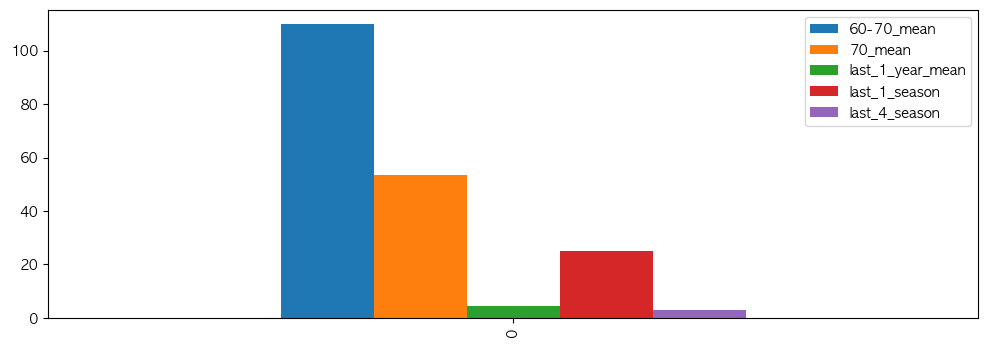

In [286]:
df_loss.plot.bar( figsize=(12,4))